<a href="https://colab.research.google.com/github/PsorTheDoctor/Sekcja-SI/blob/master/neural_networks/MLP/experimental/trainable_sigmoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trainable sigmoid nets

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Layer, Flatten, Dense, Conv2D, MaxPooling2D

In [2]:
(X_train, y_train), (X_test, y_test) = load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [3]:
X_train = X_train / 255
X_test = X_test / 255

In [4]:
class TrainableSigmoid(Layer):
  def __init__(self, units):
    super(TrainableSigmoid, self).__init__()
    self.units = units
    self.initializer = keras.initializers.get('random_normal')
    self.activation = keras.activations.get('sigmoid') 
  
  def build(self, input_shape):
    self.beta = self.add_weight(
        shape=(input_shape[-1], self.units),
        initializer=self.initializer,
        trainable=True
    )

  def call(self, inputs):
    x = tf.matmul(inputs, self.beta)
    return self.activation(x)

In [5]:
def net():
  model = Sequential()
  model.add(Flatten(input_shape=(32, 32, 3)))
  model.add(Dense(1000, activation='sigmoid'))
  model.add(Dense(120, activation='sigmoid'))
  model.add(Dense(84, activation='sigmoid'))
  model.add(Dense(10, activation='softmax'))

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [6]:
def trainable_sigmoid_net():
  model = Sequential()
  model.add(Flatten(input_shape=(32, 32, 3)))
  model.add(Dense(1000, activation='linear'))
  model.add(TrainableSigmoid(1000))
  model.add(Dense(120, activation='linear'))
  model.add(TrainableSigmoid(120))
  model.add(Dense(84, activation='linear'))
  model.add(TrainableSigmoid(84))
  model.add(Dense(10, activation='softmax'))

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [7]:
model1 = net()
history1 = model1.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 11s 5ms/step - loss: 1.9600 - accuracy: 0.2734
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8337 - accuracy: 0.3304
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7829 - accuracy: 0.3512
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7490 - accuracy: 0.3649
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7191 - accuracy: 0.3771
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6993 - accuracy: 0.3863
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6766 - accuracy: 0.3939
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6489 - accuracy: 0.4070
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6370 - accuracy: 0.4111
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.61

In [8]:
model2 = trainable_sigmoid_net()
history2 = model2.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 11s 7ms/step - loss: 2.1530 - accuracy: 0.1605
Epoch 2/10
1563/1563 [==============================] - 10s 7ms/step - loss: 2.0830 - accuracy: 0.1820
Epoch 3/10
1563/1563 [==============================] - 10s 7ms/step - loss: 2.0691 - accuracy: 0.1865
Epoch 4/10
1563/1563 [==============================] - 10s 7ms/step - loss: 2.0835 - accuracy: 0.1846
Epoch 5/10
1563/1563 [==============================] - 10s 7ms/step - loss: 2.1072 - accuracy: 0.1794
Epoch 6/10
1563/1563 [==============================] - 10s 7ms/step - loss: 2.0644 - accuracy: 0.1878
Epoch 7/10
1563/1563 [==============================] - 10s 7ms/step - loss: 2.0599 - accuracy: 0.1901
Epoch 8/10
1563/1563 [==============================] - 10s 7ms/step - loss: 2.0613 - accuracy: 0.1889
Epoch 9/10
1563/1563 [==============================] - 10s 6ms/step - loss: 2.0612 - accuracy: 0.1898
Epoch 10/10
1563/1563 [==============================] - 10s 6ms/step - l

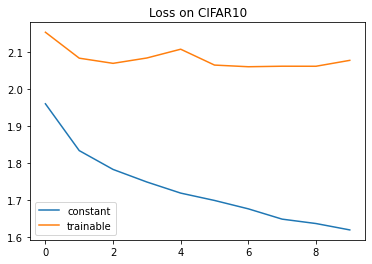

In [9]:
plt.title('Loss on CIFAR10')
plt.plot(history1.history['loss'], label='constant')
plt.plot(history2.history['loss'], label='trainable')
plt.legend()

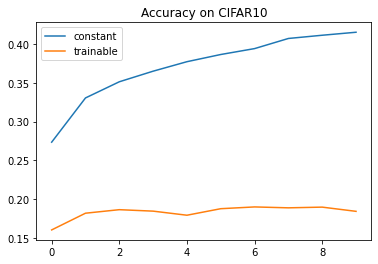

In [10]:
plt.title('Accuracy on CIFAR10')
plt.plot(history1.history['accuracy'], label='constant')
plt.plot(history2.history['accuracy'], label='trainable')
plt.legend()